## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
# use the model in example program
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.0, 0.3, 0.75, 1.2, 1.5]

In [7]:
results = {}

for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.2f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-momentum-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with MOMENTUM = 0.00
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

50000/50000 [==============================] - 5s 106us/step - loss: 1.2464 - accuracy: 0.5619 - val_loss: 1.4292 - val_accuracy: 0.4902
Epoch 49/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2404 - accuracy: 0.5651 - val_loss: 1.5163 - val_accuracy: 0.4626
Epoch 50/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2320 - accuracy: 0.5676 - val_loss: 1.4812 - val_accuracy: 0.4836
Experiment with MOMENTUM = 0.30
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________________

Epoch 46/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.1827 - accuracy: 0.5840 - val_loss: 1.6543 - val_accuracy: 0.4370
Epoch 47/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.1727 - accuracy: 0.5874 - val_loss: 1.4560 - val_accuracy: 0.4802
Epoch 48/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.1719 - accuracy: 0.5888 - val_loss: 1.4264 - val_accuracy: 0.4900
Epoch 49/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.1597 - accuracy: 0.5934 - val_loss: 1.3927 - val_accuracy: 0.5057
Epoch 50/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.1517 - accuracy: 0.5943 - val_loss: 1.5623 - val_accuracy: 0.4670
Experiment with MOMENTUM = 0.75
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
________

50000/50000 [==============================] - 5s 101us/step - loss: 0.8688 - accuracy: 0.6941 - val_loss: 1.5774 - val_accuracy: 0.5003
Epoch 44/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.8607 - accuracy: 0.6977 - val_loss: 1.3876 - val_accuracy: 0.5318
Epoch 45/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.8407 - accuracy: 0.7058 - val_loss: 1.6621 - val_accuracy: 0.4687
Epoch 46/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.8327 - accuracy: 0.7102 - val_loss: 1.4625 - val_accuracy: 0.5263
Epoch 47/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.8087 - accuracy: 0.7193 - val_loss: 1.6198 - val_accuracy: 0.4919
Epoch 48/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.7984 - accuracy: 0.7210 - val_loss: 1.5344 - val_accuracy: 0.5062
Epoch 49/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.7846 - accuracy: 0.7247 - val_loss:

50000/50000 [==============================] - 5s 105us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 5s 105us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 5s 106us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 5s 104us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 106us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 105us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 5s 106us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 49/50

Epoch 42/50
50000/50000 [==============================] - 5s 101us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 5s 101us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 5s 100us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 5s 101us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 101us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 100us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 5s 101us/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000

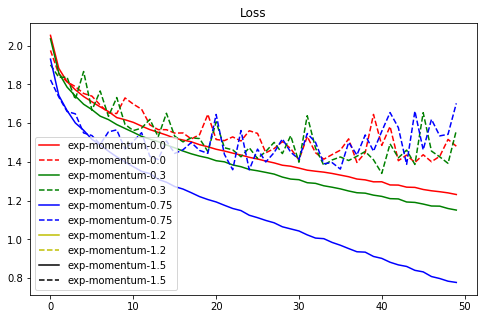

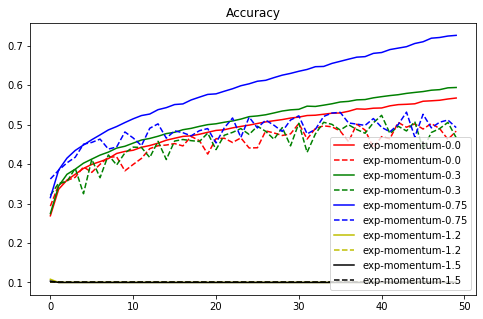

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "k"]

plt.figure(figsize=(8,5))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()